# Phase 1

The first phase of the case study involves four sections – (1) dataset description, (2) data cleaning, (3) Exploratory Data Analysis, and (4) research question.

## Dataset Description

Each group should select one real-world dataset from the list of datasets provided for the project. Each dataset has a description file, which also contains a detailed description of each variable.

In this section of the notebook, you must fulfill the following:

- State a brief description of the dataset.
- Provide a description of the collection process executed to build the dataset.
- Discuss the implications of the data collection method on the generated conclusions and insights.
- Note that you may need to look at relevant sources related to the dataset to acquire necessary information for this part of the project.
- Describe the structure of the dataset file.
  - What does each row and column represent?
  - How many observations are there in the dataset?
  - How many variables are there in the dataset?
  - If the dataset is composed of different files that you will combine in the succeeding steps, describe the structure and the contents of each file.
- Discuss the variables in each dataset file. What does each variable represent? All variables, even those which are not used for the study, should be described to the reader. The purpose of each variable in the dataset should be clear to the reader of the notebook without having to go through an external link.


In [2]:
#IMPORTS

import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)


from scipy.stats import zscore
from scipy import stats
from scipy.stats import chi2_contingency


In [3]:
#LOAD SOF PUF 2015 FILE

file_path = 'SOF PUF 2015.csv'
data = pd.read_csv(file_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RREG            5440 non-null   int64  
 1   HHNUM           5440 non-null   int64  
 2   RRPL            5440 non-null   int64  
 3   RSTR            5440 non-null   int64  
 4   RPSU            5440 non-null   int64  
 5   RROTATION       5440 non-null   int64  
 6   RQ1_LNO         5440 non-null   int64  
 7   RQ2_REL         5440 non-null   int64  
 8   RQ3_SEX         5440 non-null   int64  
 9   RQ4_AGE         5440 non-null   int64  
 10  RQ5_TMSLEFT     5440 non-null   int64  
 11  RQ6M_DTLEFT     5440 non-null   int64  
 12  RQ6Y_DTLEFT     5440 non-null   int64  
 13  RQ7_MSTAT       5438 non-null   float64
 14  RQ8_HGRADE      5440 non-null   int64  
 15  RQ9_USOCC       5440 non-null   int64  
 16  RQ10_REASON     5440 non-null   int64  
 17  RQ11_BASE       5012 non-null   f


## Data Cleaning

For each used variable, check all the following and, if needed, perform data cleaning:

- There are multiple representations of the same categorical value.
- The datatype of the variable is incorrect.
- Some values are set to default values of the variable.
- There are missing data.
- There are duplicate data.
- The formatting of the values is inconsistent.

**Note**: No need to clean all variables. Clean only the variables utilized in the study.



## Exploratory Data Analysis

Perform exploratory data analysis comprehensively to gain a good understanding of your dataset. This step should help in formulating the research question of the project.

In this section of the notebook, you must fulfill the following:

- Identify **at least 4 exploratory data analysis questions**. Properly state the questions in the notebook. Having more than 4 questions is acceptable, especially if this will help in understanding the data better.
- Answer the EDA questions using both:
  - **Numerical Summaries** – measures of central tendency, measures of dispersion, and correlation.
  - **Visualization** – Appropriate visualization should be used. Each visualization should be accompanied by a brief explanation.

**To emphasize, both numerical summary and visualization should be presented for each question.**  
The whole process should be supported with verbose textual descriptions of your procedures and findings.


EXPLORATORY DATA ANALYSIS QUESTIONS:

1. Demographic
2. Financial
3. Employment
4. Migration

In [56]:
#Once datacleaning is done, I'll edit it >3<

data.shape

(5440, 48)

In [57]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RREG            5440 non-null   int64  
 1   HHNUM           5440 non-null   int64  
 2   RRPL            5440 non-null   int64  
 3   RSTR            5440 non-null   int64  
 4   RPSU            5440 non-null   int64  
 5   RROTATION       5440 non-null   int64  
 6   RQ1_LNO         5440 non-null   int64  
 7   RQ2_REL         5440 non-null   int64  
 8   RQ3_SEX         5440 non-null   int64  
 9   RQ4_AGE         5440 non-null   int64  
 10  RQ5_TMSLEFT     5440 non-null   int64  
 11  RQ6M_DTLEFT     5440 non-null   int64  
 12  RQ6Y_DTLEFT     5440 non-null   int64  
 13  RQ7_MSTAT       5438 non-null   float64
 14  RQ8_HGRADE      5440 non-null   int64  
 15  RQ9_USOCC       5440 non-null   int64  
 16  RQ10_REASON     5440 non-null   int64  
 17  RQ11_BASE       5012 non-null   f

,RREG,HHNUM,RRPL,RSTR,RPSU,RROTATION,RQ1_LNO,RQ2_REL,RQ3_SEX,RQ4_AGE,RQ5_TMSLEFT,RQ6M_DTLEFT,RQ6Y_DTLEFT,RQ7_MSTAT,RQ8_HGRADE,RQ9_USOCC,RQ10_REASON,RQ11_BASE,RQ12_CTRY,RQ13_STAY,RQ14_INDWORK,RQ15_OCCUP1,RQ16_NOMONTH,RQ17_RET,RQ18M_DTRET,RQ18Y_DTRET,RQ19_REASON,RQ20M_DTEXP,RQ20Y_DTEXP,RQ21_CASHREM,RQ22_CASHAMT,RQ23_MODE,RQ241C_CONSUM,RQ241P_CONSUM,RQ242C_INVEST,RQ242P_INVEST,RQ243C_SAVINGS,RQ243P_SAVINGS,RQ244C_GIFT,RQ244P_GIFT,RQ245C_OTHERS,RQ245P_OTHERS,RQ25_RET6MOS,RQ26_CASHHOME,RQ27_INKIND,RQ28_KINDAMT,RSWGT,RP6M_IND
0,1,1,1,21125,10,26,81,8,2,59,3,1,2015,3.0,4,131,6,NaN,500,18,1,513.0,24.0,2,NaN,NaN,NaN,7.0,2016.0,1,60000.0,1.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1,7500.0,483.3481,NaN
1,1,2,1,21125,10,26,3,3,1,29,1,7,2012,1.0,67,223,1,1.0,213,36,1,222.0,36.0,1,7.0,2015.0,2.0,NaN,NaN,1,15000.0,1.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,50000.0,1,8000.0,512.6429,1.0
2,1,2,1,21125,10,26,4,3,2,25,1,4,2012,2.0,67,223,1,1.0,233,24,1,223.0,24.0,1,4.0,2014.0,2.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,60000.0,2,NaN,539.1801,2.0
3,1,2,1,21125,10,26,10,3,1,30,4,1,2015,1.0,68,512,1,1.0,234,12,1,512.0,40.0,2,NaN,NaN,NaN,1.0,2016.0,1,48000.0,1.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1,8000.0,512.6429,1.0
4,1,3,1,21125,10,26,2,3,1,35,2,2,2011,2.0,4,721,2,1.0,214,36,1,826.0,45.0,1,12.0,2013.0,2.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,477.4089,2.0


In [63]:
#Descriptive statistics
data.describe()

,RREG,HHNUM,RRPL,RSTR,RPSU,RROTATION,RQ1_LNO,RQ2_REL,RQ3_SEX,RQ4_AGE,RQ5_TMSLEFT,RQ6M_DTLEFT,RQ6Y_DTLEFT,RQ7_MSTAT,RQ8_HGRADE,RQ9_USOCC,RQ10_REASON,RQ11_BASE,RQ12_CTRY,RQ13_STAY,RQ14_INDWORK,RQ15_OCCUP1,RQ16_NOMONTH,RQ17_RET,RQ18M_DTRET,RQ18Y_DTRET,RQ19_REASON,RQ20M_DTEXP,RQ20Y_DTEXP,RQ21_CASHREM,RQ22_CASHAMT,RQ23_MODE,RQ241C_CONSUM,RQ241P_CONSUM,RQ242C_INVEST,RQ242P_INVEST,RQ243C_SAVINGS,RQ243P_SAVINGS,RQ244C_GIFT,RQ244P_GIFT,RQ245C_OTHERS,RQ245P_OTHERS,RQ25_RET6MOS,RQ26_CASHHOME,RQ27_INKIND,RQ28_KINDAMT,RSWGT,RP6M_IND
count,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5438.000000,5440.000000,5440.000000,5440.000000,5012.000000,5440.000000,5440.000000,5440.000000,5067.000000,5067.000000,5440.000000,1259.000000,1259.000000,1259.000000,4181.000000,4181.000000,5440.000000,4003.000000,4003.000000,3933.0,3933.000000,1079.0,1079.000000,1564.0,1564.000000,537.0,537.000000,48.0,48.000000,5440.000000,975.000000,5440.000000,814.000000,5440.000000,5362.000000
mean,13.708272,2306.230331,2.493750,21170.534559,7816.958088,26.991912,4.789890,2.826654,1.534559,36.579044,2.006250,6.490441,2013.888971,1.826958,33.764890,418.355699,1.325000,1.129689,261.915625,25.758824,1.068750,667.439708,27.718571,1.769853,6.953137,2014.277998,2.289118,12.792155,2515.804831,1.264154,63923.842618,2.882838,1.0,82.087211,2.0,30.851715,3.0,23.180946,4.0,10.988827,5.0,37.625000,1.820772,72803.774359,1.850368,18317.119165,541.305478,1.155166
std,13.852386,1335.172225,1.113836,3954.024062,5298.529355,1.000059,11.122881,1.543244,0.498850,10.760527,1.986616,3.493895,1.191758,0.814862,29.818956,331.584532,1.081306,0.335994,86.308339,19.175003,0.253052,257.988282,16.750183,0.433022,3.924186,1.023065,0.578332,21.483155,1784.555012,0.440922,67404.802457,1.940652,0.0,22.246624,0.0,22.054963,0.0,18.353321,0.0,12.115576,0.0,26.419388,0.383578,83715.812143,0.356743,17235.232200,194.143317,0.362097
min,1.000000,1.000000,1.000000,10001.000000,10.000000,26.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2010.000000,1.000000,0.000000,11.000000,1.000000,1.000000,100.000000,0.000000,1.000000,111.000000,0.000000,1.000000,1.000000,2010.000000,1.000000,1.000000,2015.000000,1.000000,1300.000000,1.000000,1.0,5.000000,2.0,1.000000,3.0,1.000000,4.0,1.000000,5.0,10.000000,1.000000,0.000000,1.000000,1000.000000,124.489100,1.000000
25%,3.000000,1137.750000,2.000000,21115.000000,2941.000000,26.000000,2.000000,2.000000,1.000000,28.000000,1.000000,4.000000,2013.000000,1.000000,4.000000,23.000000,1.000000,1.000000,222.000000,12.000000,1.000000,512.000000,13.000000,2.000000,5.000000,2014.000000,2.000000,4.000000,2016.000000,1.000000,28000.000000,1.000000,1.0,70.000000,2.0,15.000000,3.0,10.000000,4.0,5.000000,5.0,17.500000,2.000000,24000.000000,2.000000,7000.000000,415.825500,1.000000
50%,9.000000,2311.500000,2.000000,22111.000000,6843.000000,26.000000,3.000000,3.000000,2.000000,34.000000,2.000000,6.500000,2014.000000,2.000000,6.000000,421.000000,1.000000,1.000000,233.000000,24.000000,1.000000,724.000000,26.000000,2.000000,7.000000,2015.000000,2.000000,7.000000,2016.000000,1.000000,47000.000000,2.000000,1.0,90.000000,2.0,22.000000,3.0,20.000000,4.0,10.000000,5.0,30.000000,2.000000,50000.000000,2.000000,12000.000000,537.139100,1.000000
75%,14.000000,3460.250000,3.000000,23205.000000,13399.750000,28.000000,4.000000,3.000000,2.000000,43.000000,2.000000,9.000000,2015.000000,2.000000,65.000000,723.000000,1.000000,1.000000,234.000000,26.000000,1.000000,913.000000,41.000000,2.000000,9.000000,2015.000000,3.000000,11.000000,2017.000000,2.000000,77500.000000,5.000000,1.0,100.000000,2.0,45.000000,3.0,30.000000,4.0,10.000000,5.0,50.000000,2.000000,100000.000000,2.000000,25000.000000,655.102100,1.000000
max,42.000000,4579.000000,4.000000,29007.000000,16569.000000,28.000000,83.000000,11.000000,2.000000,86.000000,99.000000,99.000000,2015.000000,6.000000,90.000000,933.000000,8.000000,2.00000

Summary statistics for Age:
count    5440.000000
mean       36.579044
std        10.760527
min         3.000000
25%        28.000000
50%        34.000000
75%        43.000000
max        86.000000
Name: RQ4_AGE, dtype: float64
Gender distribution:
RQ3_SEX
2    2908
1    2532
Name: count, dtype: int64


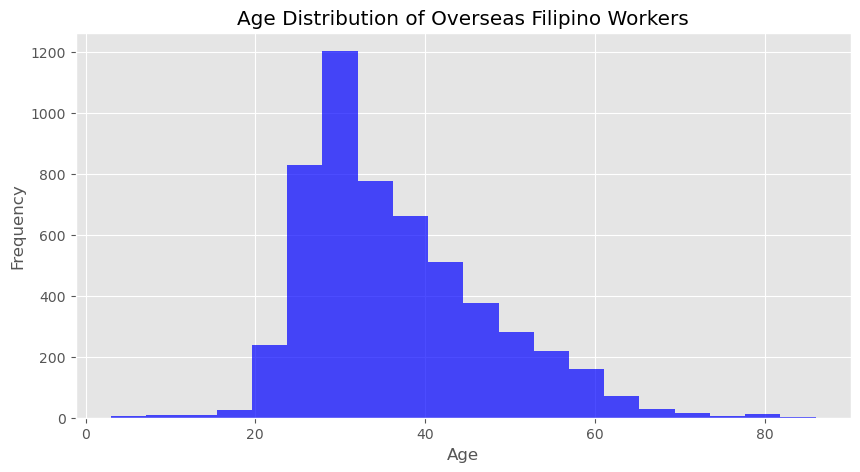

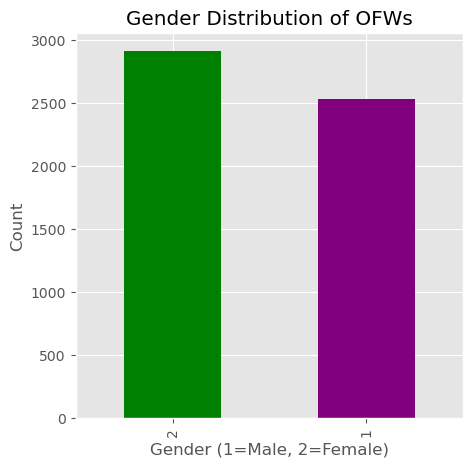

In [5]:
#Age
age_summary = data['RQ4_AGE'].describe()
print("Summary statistics for Age:")
print(age_summary)

#Gender (1 = Male, 2 = Female)
gender_distribution = data['RQ3_SEX'].value_counts()
print("Gender distribution:")
print(gender_distribution)

#Histogram - Age

plt.figure(figsize=(10, 5))
plt.hist(data['RQ4_AGE'].dropna(), bins=20, color='blue', alpha=0.7)
plt.title('Age Distribution of Overseas Filipino Workers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#Bar chart - Gender
plt.figure(figsize=(5, 5))
gender_distribution.plot(kind='bar', color=['green', 'purple'])
plt.title('Gender Distribution of OFWs')
plt.xlabel('Gender (1=Male, 2=Female)')
plt.ylabel('Count')
plt.show()


<Figure size 1200x600 with 0 Axes>

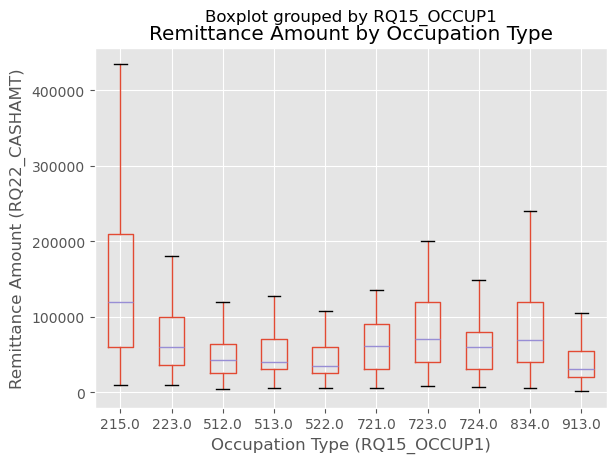

In [55]:
#Occupations

top_occupations = data['RQ15_OCCUP1'].value_counts().nlargest(10).index
df_top_occupations = data[data['RQ15_OCCUP1'].isin(top_occupations)]

plt.figure(figsize=(12, 6))
df_top_occupations.boxplot(column='RQ22_CASHAMT', by='RQ15_OCCUP1', showfliers=False)
plt.title('Remittance Amount by Occupation Type')
plt.xlabel('Occupation Type (RQ15_OCCUP1)')
plt.ylabel('Remittance Amount (RQ22_CASHAMT)')
plt.show()


In [58]:
#Missing values
total_rows = len(data)

missing_values = data.isnull().sum()

missing_percentage = (missing_values / total_rows) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)


                Missing Values  Percentage
RREG                         0    0.000000
HHNUM                        0    0.000000
RRPL                         0    0.000000
RSTR                         0    0.000000
RPSU                         0    0.000000
RROTATION                    0    0.000000
RQ1_LNO                      0    0.000000
RQ2_REL                      0    0.000000
RQ3_SEX                      0    0.000000
RQ4_AGE                      0    0.000000
RQ5_TMSLEFT                  0    0.000000
RQ6M_DTLEFT                  0    0.000000
RQ6Y_DTLEFT                  0    0.000000
RQ7_MSTAT                    2    0.036765
RQ8_HGRADE                   0    0.000000
RQ9_USOCC                    0    0.000000
RQ10_REASON                  0    0.000000
RQ11_BASE                  428    7.867647
RQ12_CTRY                    0    0.000000
RQ13_STAY                    0    0.000000
RQ14_INDWORK                 0    0.000000
RQ15_OCCUP1                373    6.856618
RQ16_NOMONT

In [60]:
threshold = 5
columns_with_high_missing = missing_data[missing_data['Percentage'] > threshold]
print("\nColumns with more than 5% missing values:")
print(columns_with_high_missing)


Columns with more than 5% missing values:
                Missing Values  Percentage
RQ11_BASE                  428    7.867647
RQ15_OCCUP1                373    6.856618
RQ16_NOMONTH               373    6.856618
RQ18M_DTRET               4181   76.856618
RQ18Y_DTRET               4181   76.856618
RQ19_REASON               4181   76.856618
RQ20M_DTEXP               1259   23.143382
RQ20Y_DTEXP               1259   23.143382
RQ22_CASHAMT              1437   26.415441
RQ23_MODE                 1437   26.415441
RQ241C_CONSUM             1507   27.702206
RQ241P_CONSUM             1507   27.702206
RQ242C_INVEST             4361   80.165441
RQ242P_INVEST             4361   80.165441
RQ243C_SAVINGS            3876   71.250000
RQ243P_SAVINGS            3876   71.250000
RQ244C_GIFT               4903   90.128676
RQ244P_GIFT               4903   90.128676
RQ245C_OTHERS             5392   99.117647
RQ245P_OTHERS             5392   99.117647
RQ26_CASHHOME             4465   82.077206
RQ28_KINDAM

In [61]:
# Get the number of unique values for each column
unique_count = data.nunique()
print(unique_count)


RREG                17
HHNUM             4579
RRPL                 4
RSTR               763
RPSU              1866
RROTATION            2
RQ1_LNO             18
RQ2_REL              9
RQ3_SEX              2
RQ4_AGE             79
RQ5_TMSLEFT         18
RQ6M_DTLEFT         13
RQ6Y_DTLEFT          6
RQ7_MSTAT            6
RQ8_HGRADE          25
RQ9_USOCC          119
RQ10_REASON          8
RQ11_BASE            2
RQ12_CTRY           17
RQ13_STAY           64
RQ14_INDWORK         2
RQ15_OCCUP1         97
RQ16_NOMONTH        61
RQ17_RET             3
RQ18M_DTRET         13
RQ18Y_DTRET          6
RQ19_REASON          3
RQ20M_DTEXP         14
RQ20Y_DTEXP          7
RQ21_CASHREM         2
RQ22_CASHAMT       291
RQ23_MODE            5
RQ241C_CONSUM        1
RQ241P_CONSUM       38
RQ242C_INVEST        1
RQ242P_INVEST       33
RQ243C_SAVINGS       1
RQ243P_SAVINGS      35
RQ244C_GIFT          1
RQ244P_GIFT         21
RQ245C_OTHERS        1
RQ245P_OTHERS       14
RQ25_RET6MOS         2
RQ26_CASHHO

#data.drop(['col name], axis = 1)



In [68]:
data.isna().sum()

RREG                 0
HHNUM                0
RRPL                 0
RSTR                 0
RPSU                 0
RROTATION            0
RQ1_LNO              0
RQ2_REL              0
RQ3_SEX              0
RQ4_AGE              0
RQ5_TMSLEFT          0
RQ6M_DTLEFT          0
RQ6Y_DTLEFT          0
RQ7_MSTAT            2
RQ8_HGRADE           0
RQ9_USOCC            0
RQ10_REASON          0
RQ11_BASE          428
RQ12_CTRY            0
RQ13_STAY            0
RQ14_INDWORK         0
RQ15_OCCUP1        373
RQ16_NOMONTH       373
RQ17_RET             0
RQ18M_DTRET       4181
RQ18Y_DTRET       4181
RQ19_REASON       4181
RQ20M_DTEXP       1259
RQ20Y_DTEXP       1259
RQ21_CASHREM         0
RQ22_CASHAMT      1437
RQ23_MODE         1437
RQ241C_CONSUM     1507
RQ241P_CONSUM     1507
RQ242C_INVEST     4361
RQ242P_INVEST     4361
RQ243C_SAVINGS    3876
RQ243P_SAVINGS    3876
RQ244C_GIFT       4903
RQ244P_GIFT       4903
RQ245C_OTHERS     5392
RQ245P_OTHERS     5392
RQ25_RET6MOS         0
RQ26_CASHHO

#START THE FEATURE UNDERSTANDING

In [69]:
data

,RREG,HHNUM,RRPL,RSTR,RPSU,RROTATION,RQ1_LNO,RQ2_REL,RQ3_SEX,RQ4_AGE,RQ5_TMSLEFT,RQ6M_DTLEFT,RQ6Y_DTLEFT,RQ7_MSTAT,RQ8_HGRADE,RQ9_USOCC,RQ10_REASON,RQ11_BASE,RQ12_CTRY,RQ13_STAY,RQ14_INDWORK,RQ15_OCCUP1,RQ16_NOMONTH,RQ17_RET,RQ18M_DTRET,RQ18Y_DTRET,RQ19_REASON,RQ20M_DTEXP,RQ20Y_DTEXP,RQ21_CASHREM,RQ22_CASHAMT,RQ23_MODE,RQ241C_CONSUM,RQ241P_CONSUM,RQ242C_INVEST,RQ242P_INVEST,RQ243C_SAVINGS,RQ243P_SAVINGS,RQ244C_GIFT,RQ244P_GIFT,RQ245C_OTHERS,RQ245P_OTHERS,RQ25_RET6MOS,RQ26_CASHHOME,RQ27_INKIND,RQ28_KINDAMT,RSWGT,RP6M_IND
0,1,1,1,21125,10,26,81,8,2,59,3,1,2015,3.0,4,131,6,NaN,500,18,1,513.0,24.0,2,NaN,NaN,NaN,7.0,2016.0,1,60000.0,1.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1,7500.0,483.3481,NaN
1,1,2,1,21125,10,26,3,3,1,29,1,7,2012,1.0,67,223,1,1.0,213,36,1,222.0,36.0,1,7.0,2015.0,2.0,NaN,NaN,1,15000.0,1.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,50000.0,1,8000.0,512.6429,1.0
2,1,2,1,21125,10,26,4,3,2,25,1,4,2012,2.0,67,223,1,1.0,233,24,1,223.0,24.0,1,4.0,2014.0,2.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,60000.0,2,NaN,539.1801,2.0
3,1,2,1,21125,10,26,10,3,1,30,4,1,2015,1.0,68,512,1,1.0,234,12,1,512.0,40.0,2,NaN,NaN,NaN,1.0,2016.0,1,48000.0,1.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1,8000.0,512.6429,1.0
4,1,3,1,21125,10,26,2,3,1,35,2,2,2011,2.0,4,721,2,1.0,214,36,1,826.0,45.0,1,12.0,2013.0,2.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,477.4089,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5435,42,4575,1,21204,6194,26,6,3,1,27,1,2,2013,1.0,64,23,1,1.0,213,36,1,312.0,31.0,2,NaN,NaN,NaN,2.0,2016.0,1,50000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,5.0,95.0,2,NaN,1,15000.0,812.9461,1.0
5436,42,4576,4,21112,6211,28,2,2,2,26,1,1,2012,2.0,4,21,1,1.0,234,36,1,421.0,36.0,1,1.0,2015.0,2.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,744.4370,2.0
5437,42,4577,2,21117,6219,26,7,3,1,34,1,10,2013,4.0,6,723,1,1.0,600,36,1,921.0,23.0,2,NaN,NaN,NaN,10.0,2016.0,1,44000.0,5.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,815.7081,1.0
5438,42,4578,2,21117,6219,26,9,3,1,30,4,4,2015,1.0,65,341,1,1.0,233,12,1,724.0,48.0,2,NaN,NaN,NaN,4.0,2016.0,1,25000.0,5.0,1.0,50.0,2.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,815.7081,1.0


1. What are the demographic characteristics of the overseas Filipino workers?
2. What are the common reasons for leaving the Philippines, and how do they differ based on the type of occupation abroad?

In [70]:
data['RQ4_AGE'].describe()  # For numerical variable age
data['RQ3_SEX'].value_counts()  # For categorical variable gender


RQ3_SEX
2    2908
1    2532
Name: count, dtype: int64


## Research Question

Come up with one (1) research question to answer using the dataset. Here are some requirements:

- **Important**: The research question should arise from exploratory data analysis. There should be an explanation regarding the connection of the research question to the answers obtained from performing exploratory data analysis.
- The research question should be within the scope of the dataset.
- The research question should be answerable by performing data mining techniques (i.e., rule mining, clustering, collaborative filtering). Students cannot use other techniques that are not covered in class.
- Make sure to indicate the importance and significance of the research question.
